In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Muhmmad shaban\Downloads\archive\CAIR-CVD-2025 An Extensive Cardiovascular Disease Risk Assessment Dataset from Bangladesh\CVD Dataset.csv")

In [3]:
df.head(10)

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),...,Physical Activity Level,Family History of CVD,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score
0,F,32.0,69.1,1.71,23.6,86.2,125/79,248.0,78.0,111.0,...,Low,N,INTERMEDIARY,171.0,0.504,125.0,79.0,Elevated,140.0,17.93
1,F,55.0,118.7,1.69,41.6,82.5,139/70,162.0,50.0,135.0,...,High,Y,HIGH,169.0,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.51
2,M,NaN,NaN,1.83,26.9,106.7,104/77,103.0,73.0,114.0,...,High,Y,INTERMEDIARY,183.0,0.583,104.0,77.0,Normal,0.0,12.64
3,M,44.0,108.3,1.80,33.4,96.6,140/83,134.0,46.0,91.0,...,High,Y,INTERMEDIARY,NaN,0.537,140.0,83.0,Hypertension Stage 1,58.0,16.36
4,F,32.0,99.5,1.86,28.8,102.7,144/83,146.0,64.0,141.0,...,High,N,INTERMEDIARY,186.0,0.552,144.0,83.0,Hypertension Stage 1,52.0,17.88
5,F,58.0,117.9,1.87,33.7,81.4,142/90,156.0,67.0,82.0,...,Moderate,Y,HIGH,187.0,0.435,142.0,90.0,Hypertension Stage 2,59.0,16.96
6,M,33.0,117.9,1.82,35.6,74.8,96/63,184.0,66.0,87.0,...,Low,N,INTERMEDIARY,182.0,0.411,96.0,63.0,Normal,88.0,17.60
7,M,55.0,100.1,1.74,33.1,96.6,115/73,287.0,40.0,96.0,...,Moderate,N,HIGH,174.0,0.555,115.0,73.0,Normal,217.0,18.11
8,F,37.0,110.1,1.86,31.8,92.4,107/95,177.0,68.0,70.0,...,High,N,INTERMEDIARY,186.0,0.497,NaN,95.0,Hypertension Stage 2,79.0,15.25
9,F,58.0,97.6,1.86,28.2,74.6,133/83,281.0,68.0,126.0,...,Moderate,N,INTERMEDIARY,186.0,0.401,133.0,83.0,Hypertension Stage 1,183.0,17.91


In [4]:
dict={}
x=0
for i in df.columns:
    if(df[i].isnull().sum()>0):
        dict[x]=({i,df[i].isnull().sum()})
        x=x+1
dict

{0: {78, 'Age'},
 1: {81, 'Weight (kg)'},
 2: {67, 'Height (m)'},
 3: {64, 'BMI'},
 4: {67, 'Abdominal Circumference (cm)'},
 5: {73, 'Total Cholesterol (mg/dL)'},
 6: {80, 'HDL (mg/dL)'},
 7: {67, 'Fasting Blood Sugar (mg/dL)'},
 8: {74, 'Height (cm)'},
 9: {79, 'Waist-to-Height Ratio'},
 10: {71, 'Systolic BP'},
 11: {82, 'Diastolic BP'},
 12: {69, 'Estimated LDL (mg/dL)'},
 13: {70, 'CVD Risk Score'}}

In [5]:
age=df.Age.unique()
age.sort()
age

array([25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37.,
       38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.,
       51., 52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63.,
       64., 65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76.,
       77., 78., 79., nan])

In [6]:
df["new height"]=df["Height (cm)"]/100
df["Height"]=df["Height (m)"].combine_first(df["new height"])

In [7]:
df["Height"].isnull().sum()

6

In [15]:
def calculate_bmi(row):
    if pd.isnull(row['BMI']):
        if not pd.isnull(row['Weight (kg)']) and not pd.isnull(row['Height']):
            return round(row['Weight (kg)'] / (row['Height'] ** 2),1)
    return row['BMI']

In [17]:
df.head()

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),...,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,new height,Height
0,F,32.0,69.1,1.71,23.6,86.2,125/79,248.0,78.0,111.0,...,INTERMEDIARY,171.0,0.504,125.0,79.0,Elevated,140.0,17.93,1.71,1.71
1,F,55.0,118.7,1.69,41.6,82.5,139/70,162.0,50.0,135.0,...,HIGH,169.0,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.51,1.69,1.69
2,M,NaN,NaN,1.83,26.9,106.7,104/77,103.0,73.0,114.0,...,INTERMEDIARY,183.0,0.583,104.0,77.0,Normal,0.0,12.64,1.83,1.83
3,M,44.0,108.3,1.80,33.4,96.6,140/83,134.0,46.0,91.0,...,INTERMEDIARY,NaN,0.537,140.0,83.0,Hypertension Stage 1,58.0,16.36,NaN,1.80
4,F,32.0,99.5,1.86,28.8,102.7,144/83,146.0,64.0,141.0,...,INTERMEDIARY,186.0,0.552,144.0,83.0,Hypertension Stage 1,52.0,17.88,1.86,1.86


In [19]:
df.BMI.isnull().sum()

64

In [21]:
df['BMI'] = df.apply(calculate_bmi, axis=1)

In [23]:
df.head()

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),...,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,new height,Height
0,F,32.0,69.1,1.71,23.6,86.2,125/79,248.0,78.0,111.0,...,INTERMEDIARY,171.0,0.504,125.0,79.0,Elevated,140.0,17.93,1.71,1.71
1,F,55.0,118.7,1.69,41.6,82.5,139/70,162.0,50.0,135.0,...,HIGH,169.0,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.51,1.69,1.69
2,M,NaN,NaN,1.83,26.9,106.7,104/77,103.0,73.0,114.0,...,INTERMEDIARY,183.0,0.583,104.0,77.0,Normal,0.0,12.64,1.83,1.83
3,M,44.0,108.3,1.80,33.4,96.6,140/83,134.0,46.0,91.0,...,INTERMEDIARY,NaN,0.537,140.0,83.0,Hypertension Stage 1,58.0,16.36,NaN,1.80
4,F,32.0,99.5,1.86,28.8,102.7,144/83,146.0,64.0,141.0,...,INTERMEDIARY,186.0,0.552,144.0,83.0,Hypertension Stage 1,52.0,17.88,1.86,1.86


In [25]:
df.BMI.isnull().sum()

5

In [27]:
df["Weight (kg)"].isnull().sum()

81

In [29]:
def fill_missing_values(row):
    if pd.isnull(row['Height']):
        if not pd.isnull(row['Weight (kg)']) and not pd.isnull(row['BMI']):
            row['Height'] = round((row['Weight (kg)'] / row['BMI']) ** 0.5, 3)
    
    if pd.isnull(row['Weight (kg)']):
        if not pd.isnull(row['Height']) and not pd.isnull(row['BMI']):
            row['Weight (kg)'] = round(row['BMI'] * (row['Height'] ** 2), 1)
    
    return row


In [31]:
df = df.apply(fill_missing_values, axis=1)

In [33]:
df.head()

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),...,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,new height,Height
0,F,32.0,69.1,1.71,23.6,86.2,125/79,248.0,78.0,111.0,...,INTERMEDIARY,171.0,0.504,125.0,79.0,Elevated,140.0,17.93,1.71,1.71
1,F,55.0,118.7,1.69,41.6,82.5,139/70,162.0,50.0,135.0,...,HIGH,169.0,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.51,1.69,1.69
2,M,NaN,90.1,1.83,26.9,106.7,104/77,103.0,73.0,114.0,...,INTERMEDIARY,183.0,0.583,104.0,77.0,Normal,0.0,12.64,1.83,1.83
3,M,44.0,108.3,1.80,33.4,96.6,140/83,134.0,46.0,91.0,...,INTERMEDIARY,NaN,0.537,140.0,83.0,Hypertension Stage 1,58.0,16.36,NaN,1.80
4,F,32.0,99.5,1.86,28.8,102.7,144/83,146.0,64.0,141.0,...,INTERMEDIARY,186.0,0.552,144.0,83.0,Hypertension Stage 1,52.0,17.88,1.86,1.86


In [35]:
df["Weight (kg)"].isnull().sum()

4

In [37]:
wiraiton = adb/h
abd=wiration * h 


NameError: name 'adb' is not defined

In [77]:
# NOW WE NEED TO FIX THE WIEST TO HIEHGT RATIO AND ABDOMANAL CIRCURFERNACE NULL VALUES
def fill_missing_values_w(row):
    # Fill Waist-to-Height Ratio if it's missing
    if pd.isnull(row['Waist-to-Height Ratio']):
        if not pd.isnull(row['Abdominal Circumference (cm)']) and not pd.isnull(row['Height']):
            row['Waist-to-Height Ratio'] = round(row['Abdominal Circumference (cm)'] / (row['Height'] * 100), 3)
    
    # Fill Abdominal Circumference if it's missing
    if pd.isnull(row['Abdominal Circumference (cm)']):
        if not pd.isnull(row['Waist-to-Height Ratio']) and not pd.isnull(row['Height']):
            row['Abdominal Circumference (cm)'] = round(row['Waist-to-Height Ratio'] * (row['Height'] * 100), 1)
    
    return row


In [79]:
df = df.apply(fill_missing_values_w, axis=1)

In [81]:
df["Abdominal Circumference (cm)"].isnull().sum(),df["Waist-to-Height Ratio"].isnull().sum()

(0, 0)

In [83]:
df.isnull().sum()

Sex                              0
Age                              0
Weight (kg)                      0
BMI                              0
Abdominal Circumference (cm)     0
Total Cholesterol (mg/dL)        0
HDL (mg/dL)                      0
Fasting Blood Sugar (mg/dL)      0
Smoking Status                   0
Diabetes Status                  0
Physical Activity Level          0
Family History of CVD            0
CVD Risk Level                   0
Waist-to-Height Ratio            0
Blood Pressure Category          0
Estimated LDL (mg/dL)           51
CVD Risk Score                   0
Height                           0
Systolic                         0
Diastolic                        0
dtype: int64

In [85]:
df.dropna(subset=["Abdominal Circumference (cm)"], inplace=True)

In [87]:
df.dropna(subset=["BMI"], inplace=True)


In [89]:
print(df.columns)

Index(['Sex', 'Age', 'Weight (kg)', 'BMI', 'Abdominal Circumference (cm)',
       'Total Cholesterol (mg/dL)', 'HDL (mg/dL)',
       'Fasting Blood Sugar (mg/dL)', 'Smoking Status', 'Diabetes Status',
       'Physical Activity Level', 'Family History of CVD', 'CVD Risk Level',
       'Waist-to-Height Ratio', 'Blood Pressure Category',
       'Estimated LDL (mg/dL)', 'CVD Risk Score', 'Height', 'Systolic',
       'Diastolic'],
      dtype='object')


In [91]:
df.drop(["Systolic BP", "Diastolic BP"], axis=1, inplace=True, errors='ignore')

In [93]:
df.head(10)

,Sex,Age,Weight (kg),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,CVD Risk Level,Waist-to-Height Ratio,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,Height,Systolic,Diastolic
0,F,32.0,69.1,23.6,86.2,248.0,78.0,111.0,N,Y,Low,N,INTERMEDIARY,0.504,Elevated,140.0,17.93,1.71,125,79
1,F,55.0,118.7,41.6,82.5,162.0,50.0,135.0,Y,Y,High,Y,HIGH,0.488,Hypertension Stage 1,82.0,20.51,1.69,139,70
3,M,44.0,108.3,33.4,96.6,134.0,46.0,91.0,N,N,High,Y,INTERMEDIARY,0.537,Hypertension Stage 1,58.0,16.36,1.80,140,83
4,F,32.0,99.5,28.8,102.7,146.0,64.0,141.0,Y,Y,High,N,INTERMEDIARY,0.552,Hypertension Stage 1,52.0,17.88,1.86,144,83
5,F,58.0,117.9,33.7,81.4,156.0,67.0,82.0,Y,N,Moderate,Y,HIGH,0.435,Hypertension Stage 2,59.0,16.96,1.87,142,90
6,M,33.0,117.9,35.6,74.8,184.0,66.0,87.0,N,Y,Low,N,INTERMEDIARY,0.411,Normal,88.0,17.60,1.82,96,63
7,M,55.0,100.1,33.1,96.6,287.0,40.0,96.0,Y,N,Moderate,N,HIGH,0.555,Normal,217.0,18.11,1.74,115,73
8,F,37.0,110.1,31.8,92.4,177.0,68.0,70.0,Y,N,High,N,INTERMEDIARY,0.497,Hypertension Stage 2,79.0,15.25,1.86,107,95
9,F,58.0,97.6,28.2,74.6,281.0,68.0,126.0,N,N,Moderate,N,INTERMEDIARY,0.401,Hypertension Stage 1,183.0,17.91,1.86,133,83
10,F,38.0,75.6,29.5,72.3,269.0,61.0,74.0,Y,Y,Low,Y,HIGH,0.452,Hypertension Stage 1,178.0,19.73,1.60,129,87


In [95]:
df["Blood Pressure (mmHg)"].dtype

KeyError: 'Blood Pressure (mmHg)'

In [ ]:
df[['Systolic', 'Diastolic']] = df["Blood Pressure (mmHg)"].str.split('/', expand=True)

# Convert the new columns to numeric if needed
df['Systolic'] = pd.to_numeric(df['Systolic'])
df['Diastolic'] = pd.to_numeric(df['Diastolic'])

In [59]:
df.head()

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),...,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,new height,Height,Systolic,Diastolic
0,F,32.0,69.1,1.71,23.6,86.2,125/79,248.0,78.0,111.0,...,INTERMEDIARY,171.0,0.504,Elevated,140.0,17.93,1.71,1.71,125,79
1,F,55.0,118.7,1.69,41.6,82.5,139/70,162.0,50.0,135.0,...,HIGH,169.0,0.488,Hypertension Stage 1,82.0,20.51,1.69,1.69,139,70
2,M,NaN,90.1,1.83,26.9,106.7,104/77,103.0,73.0,114.0,...,INTERMEDIARY,183.0,0.583,Normal,0.0,12.64,1.83,1.83,104,77
3,M,44.0,108.3,1.80,33.4,96.6,140/83,134.0,46.0,91.0,...,INTERMEDIARY,NaN,0.537,Hypertension Stage 1,58.0,16.36,NaN,1.80,140,83
4,F,32.0,99.5,1.86,28.8,102.7,144/83,146.0,64.0,141.0,...,INTERMEDIARY,186.0,0.552,Hypertension Stage 1,52.0,17.88,1.86,1.86,144,83


In [61]:
df.drop("Blood Pressure (mmHg)", axis=1, inplace=True, errors='ignore')
df.drop("new height", axis=1, inplace=True, errors='ignore')
df.drop("new height", axis=1, inplace=True, errors='ignore')
df.drop("Height (m)", axis=1, inplace=True, errors='ignore')
df.drop("Height (cm)", axis=1, inplace=True, errors='ignore')

In [98]:
df.head()

,Sex,Age,Weight (kg),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,CVD Risk Level,Waist-to-Height Ratio,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,Height,Systolic,Diastolic
0,F,32.0,69.1,23.6,86.2,248.0,78.0,111.0,N,Y,Low,N,INTERMEDIARY,0.504,Elevated,140.0,17.93,1.71,125,79
1,F,55.0,118.7,41.6,82.5,162.0,50.0,135.0,Y,Y,High,Y,HIGH,0.488,Hypertension Stage 1,82.0,20.51,1.69,139,70
3,M,44.0,108.3,33.4,96.6,134.0,46.0,91.0,N,N,High,Y,INTERMEDIARY,0.537,Hypertension Stage 1,58.0,16.36,1.80,140,83
4,F,32.0,99.5,28.8,102.7,146.0,64.0,141.0,Y,Y,High,N,INTERMEDIARY,0.552,Hypertension Stage 1,52.0,17.88,1.86,144,83
5,F,58.0,117.9,33.7,81.4,156.0,67.0,82.0,Y,N,Moderate,Y,HIGH,0.435,Hypertension Stage 2,59.0,16.96,1.87,142,90


In [65]:
print(df.columns)

Index(['Sex', 'Age', 'Weight (kg)', 'BMI', 'Abdominal Circumference (cm)',
       'Total Cholesterol (mg/dL)', 'HDL (mg/dL)',
       'Fasting Blood Sugar (mg/dL)', 'Smoking Status', 'Diabetes Status',
       'Physical Activity Level', 'Family History of CVD', 'CVD Risk Level',
       'Waist-to-Height Ratio', 'Blood Pressure Category',
       'Estimated LDL (mg/dL)', 'CVD Risk Score', 'Height', 'Systolic',
       'Diastolic'],
      dtype='object')


In [608]:
df.to_csv("CVD REFINED.csv")

In [450]:
df1=df

In [114]:
df.isnull().sum()

Sex                             0
Age                             0
Weight (kg)                     0
BMI                             0
Abdominal Circumference (cm)    0
Total Cholesterol (mg/dL)       0
HDL (mg/dL)                     0
Fasting Blood Sugar (mg/dL)     0
Smoking Status                  0
Diabetes Status                 0
Physical Activity Level         0
Family History of CVD           0
CVD Risk Level                  0
Waist-to-Height Ratio           0
Blood Pressure Category         0
Estimated LDL (mg/dL)           0
CVD Risk Score                  0
Height                          0
Systolic                        0
Diastolic                       0
dtype: int64

In [112]:
df.dropna(subset=["CVD Risk Score"], inplace=True)
df.dropna(subset=["Fasting Blood Sugar (mg/dL)"], inplace=True)
df.dropna(subset=["HDL (mg/dL)"], inplace=True)
df.dropna(subset=["Age"], inplace=True)
df.dropna(subset=["Total Cholesterol (mg/dL)"], inplace=True)
df.dropna(subset=["Estimated LDL (mg/dL)"], inplace=True)


In [71]:
df.drop(df[df['Estimated LDL (mg/dL)'] < 40].index, inplace=True)

In [116]:
df.shape

(951, 20)

In [118]:
df.describe()

,Age,Weight (kg),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Waist-to-Height Ratio,Estimated LDL (mg/dL),CVD Risk Score,Height,Systolic,Diastolic
count,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000
mean,46.788644,86.237840,28.384212,92.059427,209.575184,55.298633,116.627760,0.526688,124.276551,17.218807,1.755429,126.054679,83.236593
std,12.219076,21.298843,7.126527,12.826104,52.619492,15.874812,30.850032,0.081086,52.263545,2.418736,0.113509,21.940761,14.721476
min,25.000000,50.100000,15.000000,70.000000,101.000000,30.000000,70.000000,0.360000,40.000000,10.530000,1.503000,90.000000,60.000000
25%,37.000000,66.678500,22.395000,80.630500,166.000000,41.000000,91.000000,0.460000,79.500000,15.470000,1.663500,108.000000,71.000000
50%,46.000000,87.600000,28.300000,91.800000,207.000000,55.000000,114.000000,0.524000,123.000000,17.210000,1.760000,125.000000,83.000000
75%,55.000000,105.400000,33.800000,102.622500,256.000000,68.000000,138.000000,0.584000,169.500000,18.940500,1.842000,142.000000,94.000000
max,79.000000,143.800000,46.100000,119.874000,300.000000,89.000000,198.000000,0.787000,237.000000,23.880000,2.346000,179.000000,119.000000


In [120]:
x=df["Estimated LDL (mg/dL)"].unique()


In [122]:
print(x)

[140.  82.  58.  52.  59.  88. 217.  79. 183. 178. 148. 143. 125.  44.
  86. 172.  75.  43.  96.  89. 189. 222. 215.  81.  56.  83.  51. 229.
  53.  66. 113. 147.  46. 151. 167. 118.  84.  77.  49. 138. 104.  48.
 232. 121. 197. 185.  54. 171. 126. 181. 142. 165.  40.  91. 106. 157.
  70. 187.  76. 152. 122. 130. 146. 211. 117.  95. 193.  92.  63. 196.
  85.  87.  47.  97. 188.  50. 184. 139. 198. 224. 109. 102.  90. 124.
 115. 190.  64.  73. 199.  67. 134. 112. 120.  42. 150. 103.  94. 129.
 107. 174. 168. 128.  60. 194. 214.  93.  72. 111. 119. 216.  68. 132.
  69.  55. 159.  41. 162. 210. 136.  78. 131. 225.  71. 202. 137. 237.
 144.  98. 149. 209. 105. 206.  45. 204. 108. 101. 175. 170. 218. 155.
 223. 203. 179. 114. 135. 205. 123. 163. 164. 173. 192. 169.  57. 208.
 158. 116. 227. 100. 145. 160.  80. 166. 177. 182.  74. 141.  62.  65.
 212. 230. 191. 228. 231. 153. 195. 207. 186. 176. 200. 219. 180. 201.
 221. 127.  61.  99. 133. 234. 156. 161. 110.]


In [124]:
df.head()

,Sex,Age,Weight (kg),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,CVD Risk Level,Waist-to-Height Ratio,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,Height,Systolic,Diastolic
0,F,32.0,69.1,23.6,86.2,248.0,78.0,111.0,N,Y,Low,N,INTERMEDIARY,0.504,Elevated,140.0,17.93,1.71,125,79
1,F,55.0,118.7,41.6,82.5,162.0,50.0,135.0,Y,Y,High,Y,HIGH,0.488,Hypertension Stage 1,82.0,20.51,1.69,139,70
3,M,44.0,108.3,33.4,96.6,134.0,46.0,91.0,N,N,High,Y,INTERMEDIARY,0.537,Hypertension Stage 1,58.0,16.36,1.80,140,83
4,F,32.0,99.5,28.8,102.7,146.0,64.0,141.0,Y,Y,High,N,INTERMEDIARY,0.552,Hypertension Stage 1,52.0,17.88,1.86,144,83
5,F,58.0,117.9,33.7,81.4,156.0,67.0,82.0,Y,N,Moderate,Y,HIGH,0.435,Hypertension Stage 2,59.0,16.96,1.87,142,90


In [126]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
ohe = OneHotEncoder(sparse_output=False,drop='first')

In [128]:
df["Sex"]=ohe.fit_transform(df[["Sex"]])
df["Smoking Status"]=ohe.fit_transform(df[["Smoking Status"]])
df["Diabetes Status"]=ohe.fit_transform(df[["Diabetes Status"]])
df["Family History of CVD"]=ohe.fit_transform(df[["Family History of CVD"]])

In [130]:
df['Physical Activity Level']=le.fit_transform(df[["Physical Activity Level"]])
df['CVD Risk Level']=le.fit_transform(df[["CVD Risk Level"]])
df['Blood Pressure Category']=le.fit_transform(df[["Blood Pressure Category"]])

C:\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

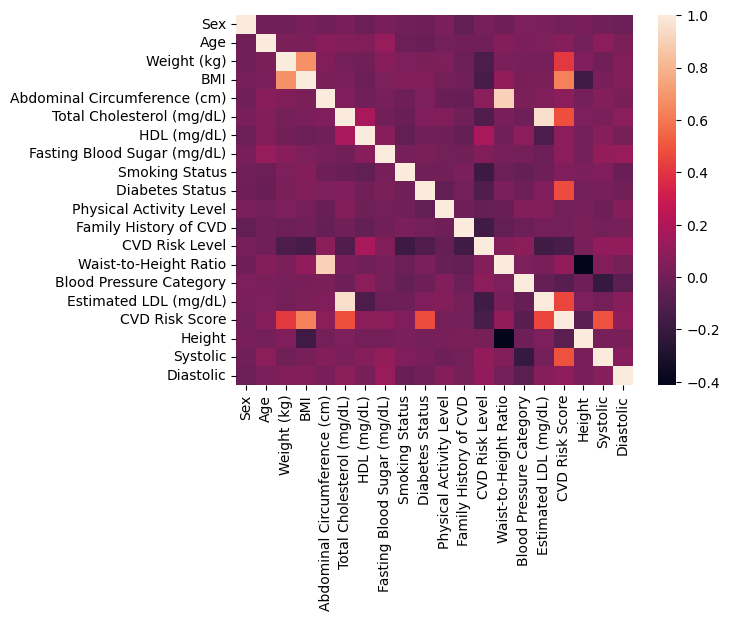

In [132]:
sns.heatmap(df.corr())

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [179]:
x=df.drop(["CVD Risk Score","CVD Risk Level"],axis=1)
y=df["CVD Risk Score"]
X=df.drop(["CVD Risk Score","CVD Risk Level"],axis=1)
Y=y=df["CVD Risk Level"]


In [138]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [140]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [142]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [144]:
print("TESTING ACCURACY : ",model.score(x_test,y_test))

print("TRAINING ACCURACY : ", model.score(x_train,y_train))

TESTING ACCURACY :  0.9501897683569813
TRAINING ACCURACY :  0.9932226783512507


In [146]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 0.41
MSE: 0.30
RMSE: 0.54
R² Score: 0.95


C:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [148]:
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, model.predict(x_train))
r2_test = r2_score(y_test, model.predict(x_test))

print(f"Train R²: {r2_train:.2f}, Test R²: {r2_test:.2f}")


Train R²: 0.99, Test R²: 0.95


In [150]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

scores = cross_val_score(model, x, y, scoring='r2', cv=5)
print(f"Cross-validated R² scores: {scores}")
print(f"Mean R²: {scores.mean():.2f}")



Cross-validated R² scores: [0.95257389 0.9506103  0.94053042 0.94365257 0.91644027]
Mean R²: 0.94


In [151]:
df.corr()

,Sex,Age,Weight (kg),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,CVD Risk Level,Waist-to-Height Ratio,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,Height,Systolic,Diastolic
Sex,1.000000,-0.007813,-0.002738,0.015922,-0.007368,0.019933,-0.021875,0.021424,-0.006204,-0.016674,0.025549,-0.055843,0.013330,-0.017723,0.039441,0.026713,0.007122,0.019310,-0.006933,-0.020062
Age,-0.007813,1.000000,0.033630,0.025803,0.068917,0.053883,0.048324,0.121466,-0.024539,-0.026056,0.006404,-0.004101,-0.008355,0.061084,0.025547,0.039572,0.064824,0.005505,0.080863,0.024926
Weight (kg),-0.002738,0.033630,1.000000,0.679485,0.051434,0.011370,-0.004032,0.070425,0.037407,0.032269,0.035359,-0.023768,-0.126383,0.029716,0.013613,0.012672,0.414086,0.043033,-0.001688,0.049572
BMI,0.015922,0.025803,0.679485,1.000000,0.034948,0.028012,-0.022278,0.038722,0.061582,0.050831,0.008941,-0.001648,-0.141972,0.104602,0.021978,0.034970,0.628717,-0.179453,0.022636,0.054259
Abdominal Circumference (cm),-0.007368,0.068917,0.051434,0.034948,1.000000,0.042058,-0.000192,0.013936,-0.015631,0.035837,-0.028031,-0.040706,0.075692,0.903985,0.032696,0.042402,0.081513,0.007732,0.056216,0.020036
Total Cholesterol (mg/dL),0.019933,0.053883,0.011370,0.028012,0.042058,1.000000,0.173192,-0.003268,-0.028844,0.041855,0.050800,-0.003984,-0.119071,0.020207,-0.013697,0.954204,0.481660,0.039399,0.027822,0.075479
HDL (mg/dL),-0.021875,0.048324,-0.004032,-0.022278,-0.000192,0.173192,1.000000,0.071780,-0.054632,-0.003864,-0.014871,-0.042356,0.174824,-0.000373,0.085680,-0.129374,0.085291,0.009931,0.063077,0.014052
Fasting Blood Sugar (mg/dL),0.021424,0.121466,0.070425,0.038722,0.013936,-0.003268,0.071780,1.000000,0.013602,0.031857,0.007133,0.000303,0.049999,0.014239,0.013109,-0.025093,0.085308,0.011230,0.109933,0.125300
Smoking Status,-0.006204,-0.024539,0.037407,0.061582,-0.015631,-0.028844,-0.054632,0.013602,1.000000,-0.004931,-0.002261,0.026440,-0.189827,-0.025229,-0.045210,-0.012447,0.041301,0.025934,0.045489,-0.027911
Diabetes Status,-0.016674,-0.026056,0.032269,0.050831,0.035837,0.041855,-0.003864,0.031857,-0.004931,1.000000,-0.051230,0.007504,-0.114946,0.027088,-0.009130,0.043313,0.471376,0.009826,0.024178,0.001953


In [205]:
aa=df["Height"].unique()
aa.sort()
aa

array([1.503  , 1.504  , 1.505  , 1.506  , 1.507  , 1.508  , 1.509  ,
       1.51   , 1.511  , 1.512  , 1.514  , 1.517  , 1.518  , 1.521  ,
       1.523  , 1.524  , 1.525  , 1.526  , 1.527  , 1.531  , 1.532  ,
       1.537  , 1.539  , 1.544  , 1.548  , 1.549  , 1.552  , 1.554  ,
       1.556  , 1.559  , 1.55931, 1.56   , 1.562  , 1.569  , 1.57   ,
       1.571  , 1.572  , 1.574  , 1.576  , 1.578  , 1.579  , 1.58   ,
       1.583  , 1.586  , 1.587  , 1.589  , 1.591  , 1.593  , 1.594  ,
       1.596  , 1.597  , 1.59965, 1.6    , 1.601  , 1.609  , 1.61   ,
       1.611  , 1.613  , 1.616  , 1.61632, 1.618  , 1.619  , 1.62   ,
       1.626  , 1.627  , 1.629  , 1.63   , 1.631  , 1.633  , 1.634  ,
       1.636  , 1.638  , 1.639  , 1.64   , 1.642  , 1.646  , 1.65   ,
       1.652  , 1.654  , 1.657  , 1.658  , 1.66   , 1.661  , 1.662  ,
       1.665  , 1.666  , 1.668  , 1.67   , 1.672  , 1.674  , 1.675  ,
       1.676  , 1.68   , 1.682  , 1.687  , 1.689  , 1.68959, 1.69   ,
       1.69097, 1.69

In [157]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [159]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import pandas as pd
import numpy as np

# Replace 'features' and 'CVD Risk Score' with your actual column names




models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0),
    "SVR": SVR()
}

results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    
    mae = mean_absolute_error(y_test, y_pred_test)
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    r2_test = r2_score(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)

    cv_scores = cross_val_score(model, x, y, cv=5, scoring='r2')

    results[name] = {
        "Training Accuracy (R²)": r2_train,
        "Testing Accuracy (R²)": r2_test,
        "CV Mean R²": cv_scores.mean(),
        "CV Std R²": cv_scores.std(),
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse
    }

results_df = pd.DataFrame(results).T.sort_values(by='Testing Accuracy (R²)', ascending=False)
print(results_df.round(4))


                  Training Accuracy (R²)  Testing Accuracy (R²)  CV Mean R²  \
LinearRegression                  0.9967                 0.9961      0.9966   
Ridge                             0.9967                 0.9961      0.9966   
GradientBoosting                  0.9956                 0.9797      0.9810   
XGBoost                           1.0000                 0.9606      0.9565   
RandomForest                      0.9936                 0.9505      0.9400   
SVR                               0.9808                 0.9500      0.9439   

                  CV Std R²     MAE     MSE    RMSE  
LinearRegression     0.0047  0.0376  0.0232  0.1524  
Ridge                0.0047  0.0381  0.0233  0.1528  
GradientBoosting     0.0057  0.2486  0.1210  0.3479  
XGBoost              0.0099  0.3495  0.2346  0.4843  
RandomForest         0.0105  0.4100  0.2950  0.5432  
SVR                  0.0387  0.3412  0.2976  0.5456  


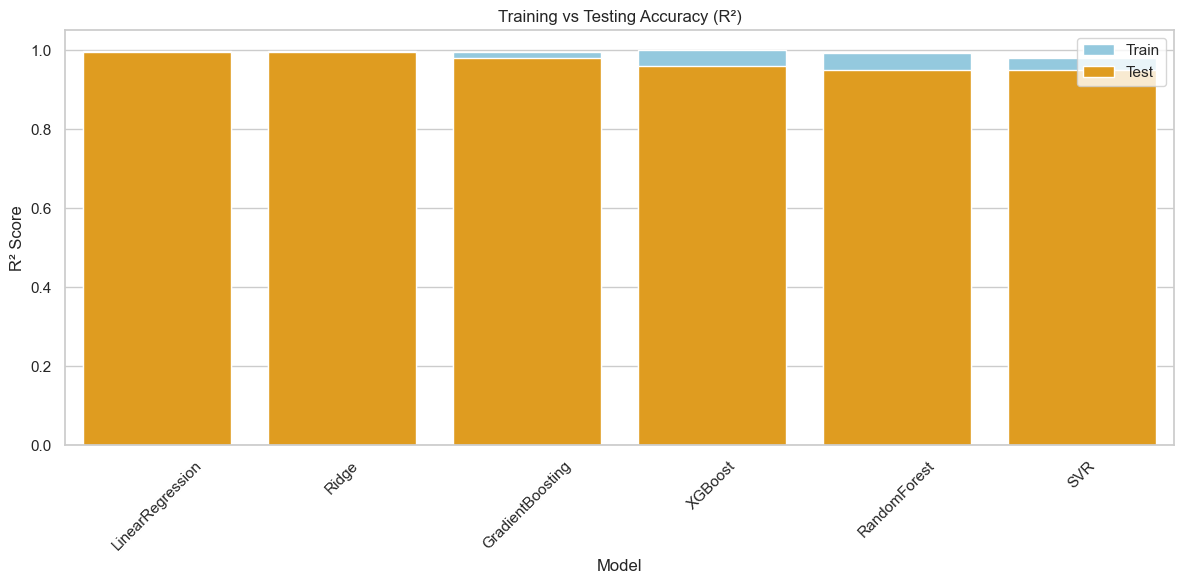

C:\Users\Muhmmad shaban\AppData\Local\Temp\ipykernel_28252\713773403.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x="Model", y="MAE", palette='magma')


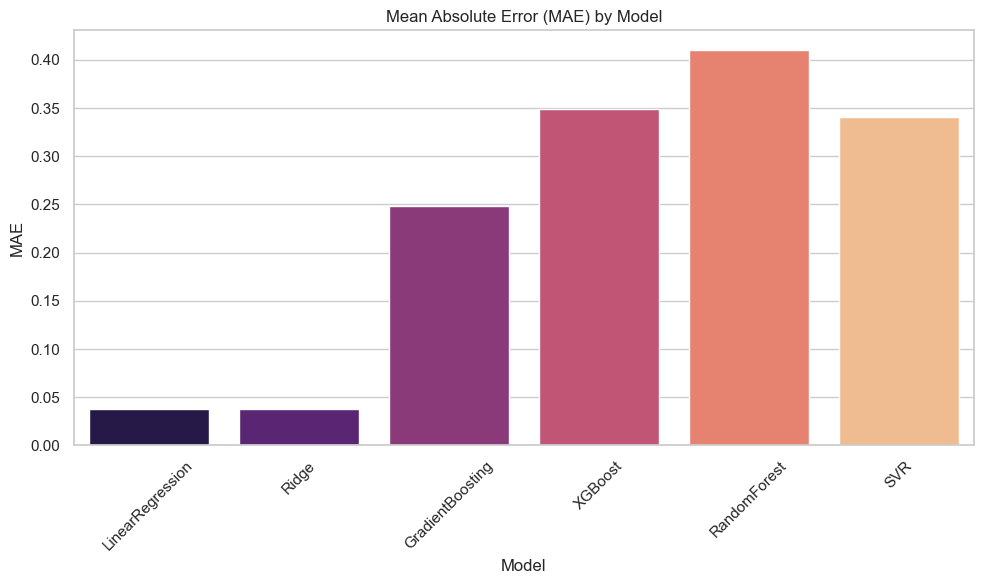

C:\Users\Muhmmad shaban\AppData\Local\Temp\ipykernel_28252\713773403.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x="Model", y="RMSE", palette='viridis')


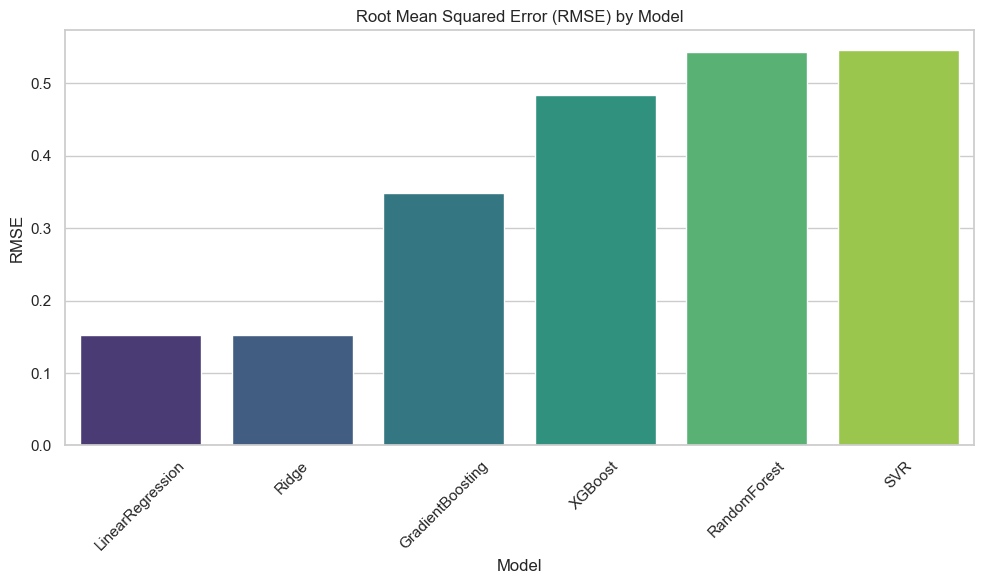

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure you have results_df from the previous step
# results_df = pd.DataFrame(results).T ...

# Reset index to use model names as a column
plot_df = results_df.reset_index().rename(columns={'index': 'Model'})

# Set seaborn style
sns.set(style="whitegrid")

# 1. Training vs Testing Accuracy (R²)
plt.figure(figsize=(12, 6))
sns.barplot(data=plot_df, x="Model", y="Training Accuracy (R²)", color='skyblue', label='Train')
sns.barplot(data=plot_df, x="Model", y="Testing Accuracy (R²)", color='orange', label='Test')
plt.title("Training vs Testing Accuracy (R²)")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# 2. MAE Comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x="Model", y="MAE", palette='magma')
plt.title("Mean Absolute Error (MAE) by Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. RMSE Comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x="Model", y="RMSE", palette='viridis')
plt.title("Root Mean Squared Error (RMSE) by Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


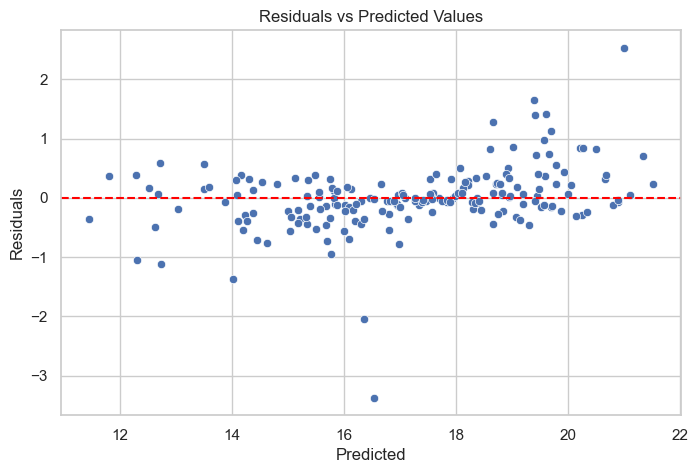

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred_test
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()


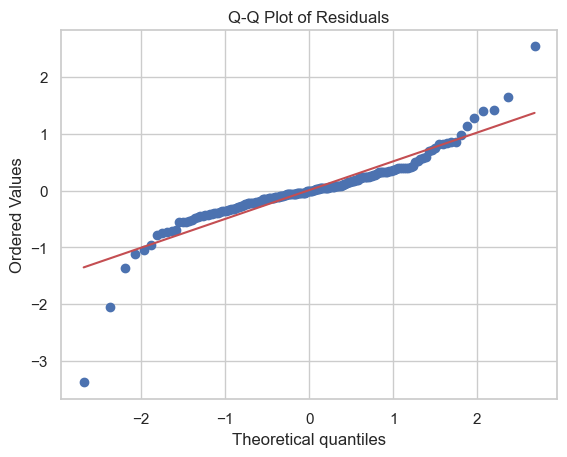

In [165]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


In [824]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw:.3f}")


Durbin-Watson statistic: 1.870


In [167]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_vif = add_constant(x)  # if not already done
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_data)


ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

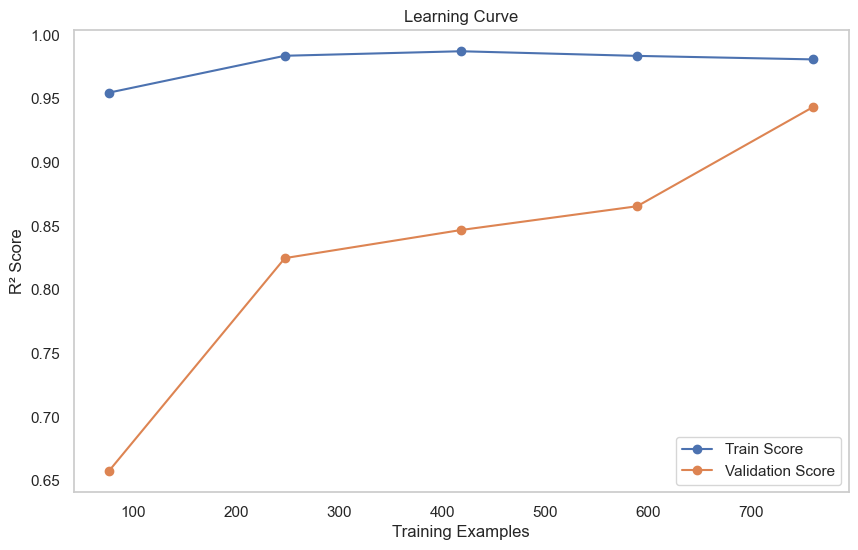

In [169]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(model, x, y, cv=5, scoring='r2')

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Train Score")
plt.plot(train_sizes, val_scores_mean, 'o-', label="Validation Score")
plt.xlabel("Training Examples")
plt.ylabel("R² Score")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()


In [836]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, x_test, y_test, scoring='r2', n_repeats=10, random_state=42)
importance_df = pd.DataFrame({'feature': x.columns, 'importance': result.importances_mean})
importance_df.sort_values(by="importance", ascending=False, inplace=True)
print(importance_df)


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

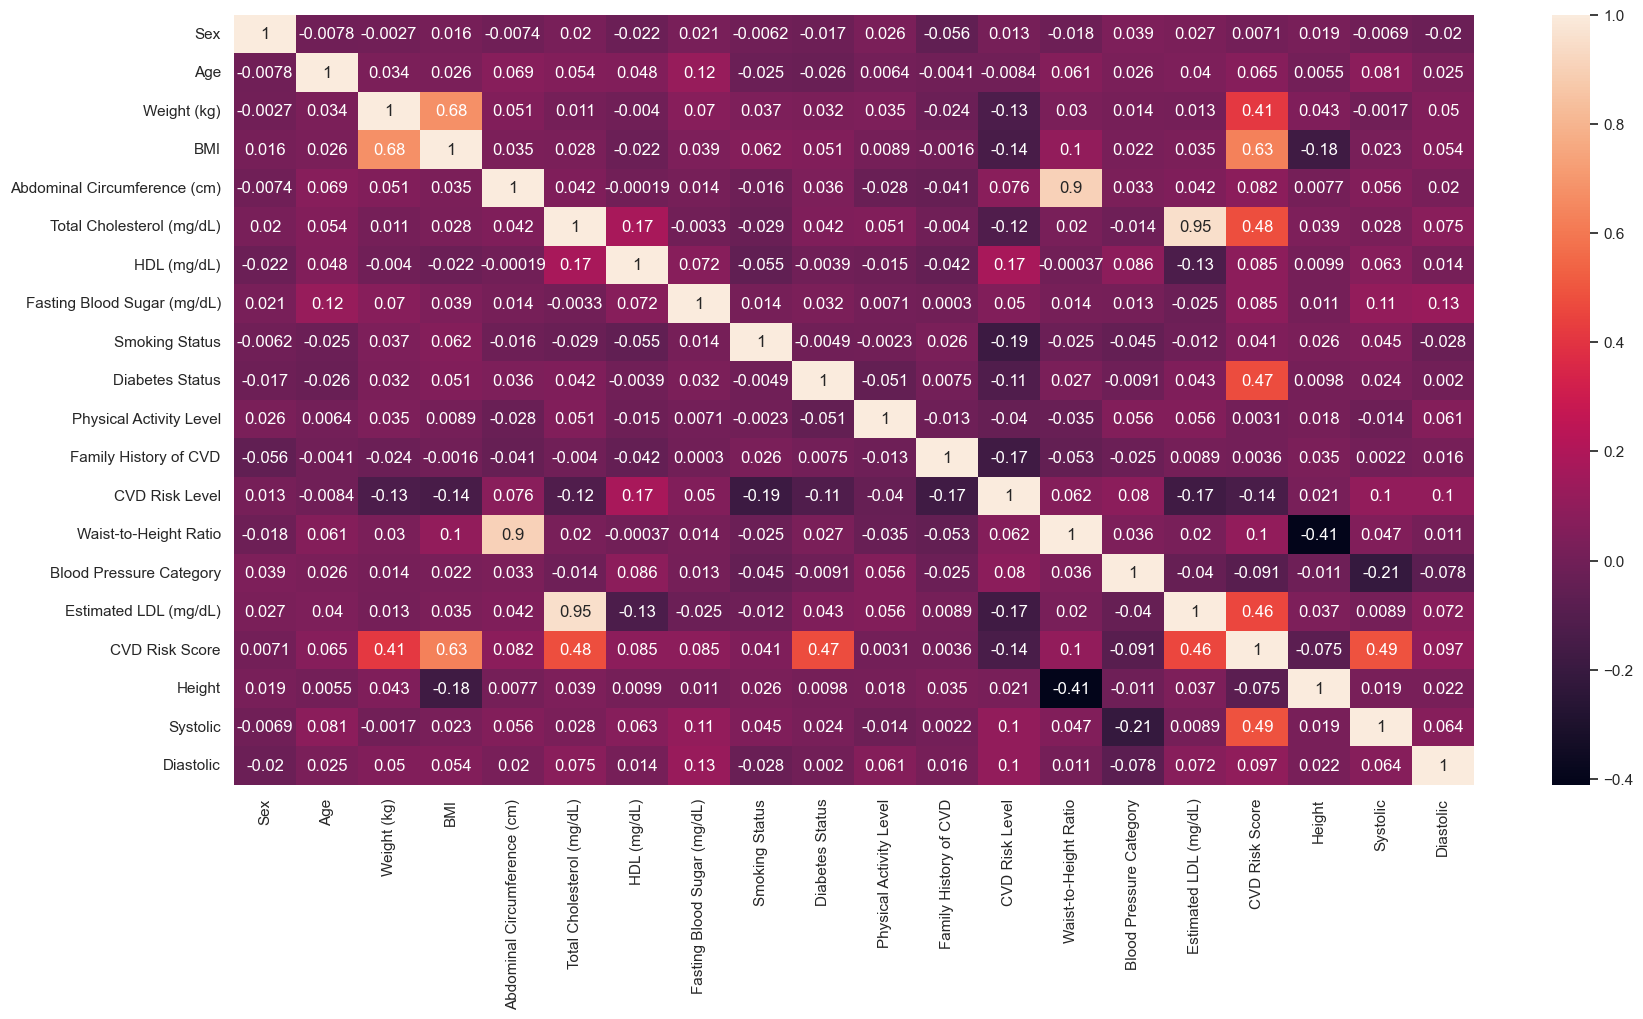

In [177]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result


🔹 Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.87      0.76        94
           1       0.61      0.57      0.59        67
           2       0.71      0.17      0.27        30

    accuracy                           0.65       191
   macro avg       0.67      0.54      0.54       191
weighted avg       0.66      0.65      0.62       191

Confusion Matrix:


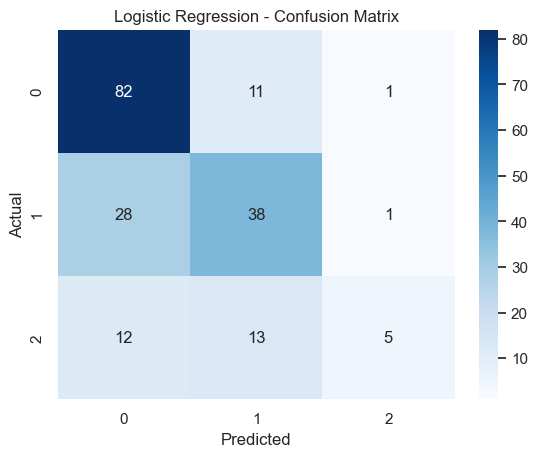


🔹 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.90      0.77        94
           1       0.63      0.58      0.60        67
           2       0.00      0.00      0.00        30

    accuracy                           0.65       191
   macro avg       0.43      0.50      0.46       191
weighted avg       0.55      0.65      0.59       191

Confusion Matrix:


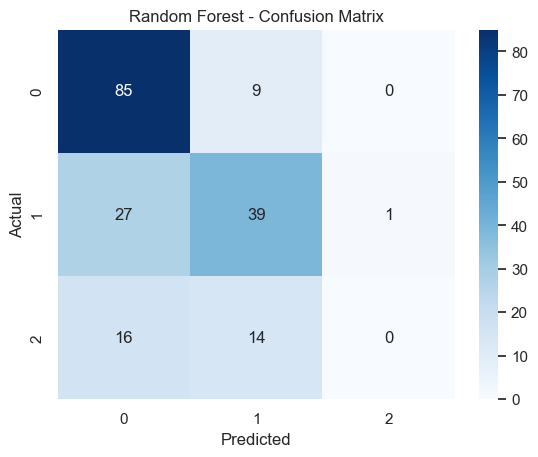


🔹 Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        94
           1       0.46      0.51      0.48        67
           2       0.22      0.17      0.19        30

    accuracy                           0.54       191
   macro avg       0.45      0.45      0.45       191
weighted avg       0.53      0.54      0.53       191

Confusion Matrix:


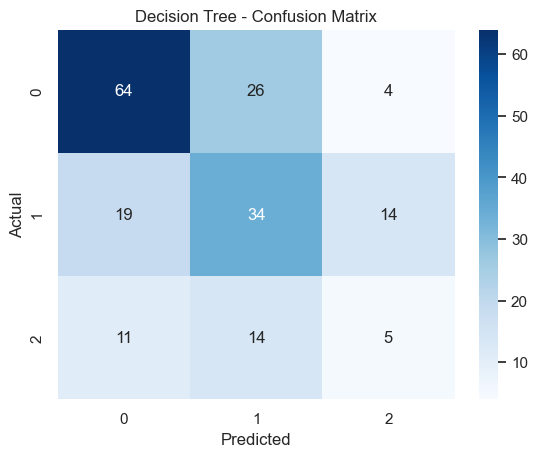


🔹 KNN Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.67      0.59        94
           1       0.38      0.37      0.38        67
           2       0.33      0.07      0.11        30

    accuracy                           0.47       191
   macro avg       0.41      0.37      0.36       191
weighted avg       0.45      0.47      0.44       191

Confusion Matrix:


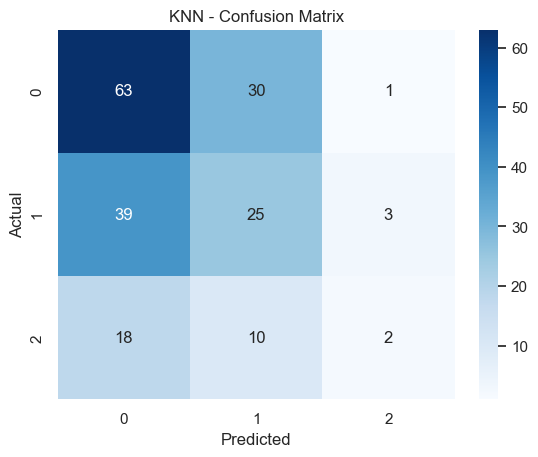

C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



🔹 SVM Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.86      0.67        94
           1       0.57      0.37      0.45        67
           2       0.00      0.00      0.00        30

    accuracy                           0.55       191
   macro avg       0.37      0.41      0.37       191
weighted avg       0.47      0.55      0.49       191

Confusion Matrix:


C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


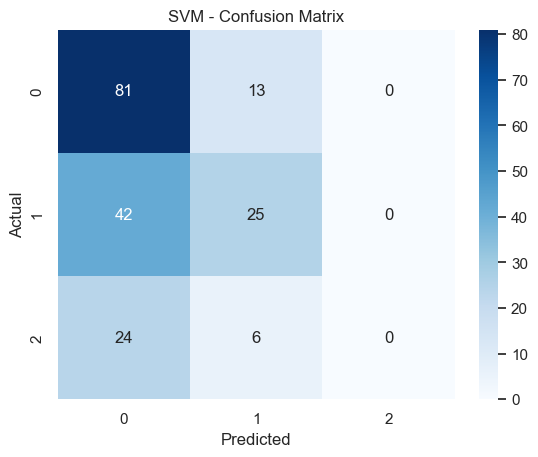


🔹 Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.88      0.80        94
           1       0.63      0.66      0.64        67
           2       0.29      0.07      0.11        30

    accuracy                           0.68       191
   macro avg       0.55      0.54      0.52       191
weighted avg       0.62      0.68      0.64       191

Confusion Matrix:


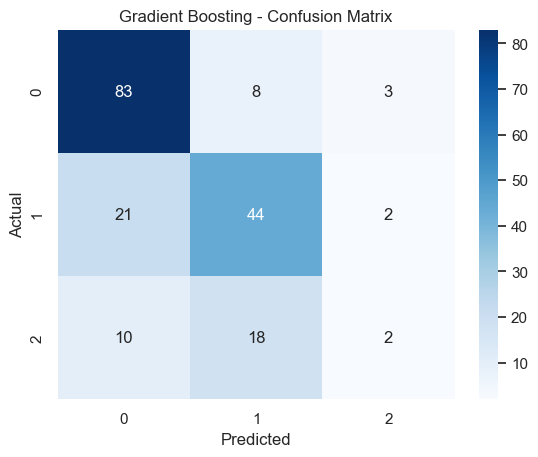

C:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:05:36] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:05:37] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:05:39] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:05:40] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔹 XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.89      0.79        94
           1       0.67      0.61      0.64        67
           2       0.40      0.13      0.20        30

    accuracy                           0.68       191
   macro avg       0.59      0.55      0.54       191
weighted avg       0.64      0.68      0.64       191

Confusion Matrix:


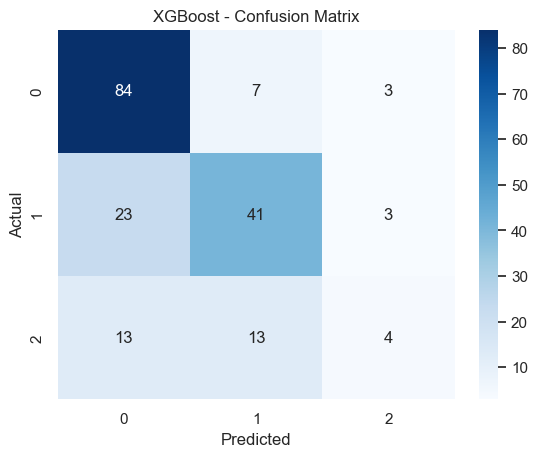

                     Accuracy  Precision  Recall  F1 Score  CV Accuracy
Gradient Boosting      0.6754     0.6237  0.6754    0.6351       0.6182
XGBoost                0.6754     0.6431  0.6754    0.6425       0.6182
Logistic Regression    0.6545     0.6580  0.6545    0.6228       0.6204
Random Forest          0.6492     0.5475  0.6492    0.5890       0.5772
SVM                    0.5550     0.4705  0.5550    0.4888       0.5457
Decision Tree          0.5393     0.5304  0.5393    0.5339       0.5225
KNN                    0.4712     0.4457  0.4712    0.4401       0.5226


In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
}

results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cv = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()

    results[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "CV Accuracy": cv
    }

    print(f"\n🔹 {name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Summary table
results_df = pd.DataFrame(results).T.sort_values(by='Accuracy', ascending=False)
print(results_df.round(4))


In [187]:
df["CVD Risk Level"].unique()

array([1, 0, 2])

In [191]:
df["CVD Risk Level"].unique()

array([1, 0, 2])